# Project Number-17 (Happiness Score Dataset)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
import matplotlib.pyplot as plt
import scipy
from scipy.stats import zscore
from scipy.stats import boxcox
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.externals import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv('happiness.csv')
data

#Importing the data in csv format
# This dataset provides the information about various factors that determines the 'happiness score' for all the countries on the planet
# based on Happiness Score, the Happiness Rank is awarded to the respective nations

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176
...,...,...,...,...,...,...,...,...,...,...,...,...
153,Rwanda,Sub-Saharan Africa,154,3.465,0.03464,0.22208,0.77370,0.42864,0.59201,0.55191,0.22628,0.67042
154,Benin,Sub-Saharan Africa,155,3.340,0.03656,0.28665,0.35386,0.31910,0.48450,0.08010,0.18260,1.63328
155,Syria,Middle East and Northern Africa,156,3.006,0.05015,0.66320,0.47489,0.72193,0.15684,0.18906,0.47179,0.32858
156,Burundi,Sub-Saharan Africa,157,2.905,0.08658,0.01530,0.41587,0.22396,0.11850,0.10062,0.19727,1.83302


# Exploring the Dataset

In [3]:
df=pd.DataFrame(data=data)
df.head()
##Converting the data into pandas dataframe

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [4]:
df.info()
#Tracking the overall information about the given dataset
## No Null values present
### Dataset is having 12 attributes out of which Happiness score is Target attribute and rest are all independant input attributes
###Country,Region are are in object format,Happiness Rank in Integer format. Rest all are in float format.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [5]:
df1=df.copy()
# taking one copy of the dataset

In [6]:
df1.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [7]:
df1.drop(['Country','Region','Happiness Rank'],inplace=True,axis=1)
# Dropping three columns which seems to be irrelevant to predict the target outcome

In [8]:
df1.shape
# ensuring the shape after dropping the columns off

(158, 9)

In [9]:
df1.describe()
# statistical analysis of the dataset
# there seems to outliers present in 'Economy','Trust government' & 'Generosity' columns since the difference is quite high between  max value and Q3

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


# Bivariate Analysis

In [10]:
df1.corr()
#checking the co-relation amonng the attributes of the dataset

,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
Happiness Score,1.000000,-0.177254,0.780966,0.740605,0.724200,0.568211,0.395199,0.180319,0.530474
Standard Error,-0.177254,1.000000,-0.217651,-0.120728,-0.310287,-0.129773,-0.178325,-0.088439,0.083981
Economy (GDP per Capita),0.780966,-0.217651,1.000000,0.645299,0.816478,0.370300,0.307885,-0.010465,0.040059
Family,0.740605,-0.120728,0.645299,1.000000,0.531104,0.441518,0.205605,0.087513,0.148117
Health (Life Expectancy),0.724200,-0.310287,0.816478,0.531104,1.000000,0.360477,0.248335,0.108335,0.018979
Freedom,0.568211,-0.129773,0.370300,0.441518,0.360477,1.000000,0.493524,0.373916,0.062783
Trust (Government Corruption),0.395199,-0.178325,0.307885,0.205605,0.248335,0.493524,1.000000,0.276123,-0.033105
Generosity,0.180319,-0.088439,-0.010465,0.087513,0.108335,0.373916,0.276123,1.000000,-0.101301
Dystopia Residual,0.530474,0.083981,0.040059,0.148117,0.018979,0.062783,-0.033105,-0.101301,1.000000


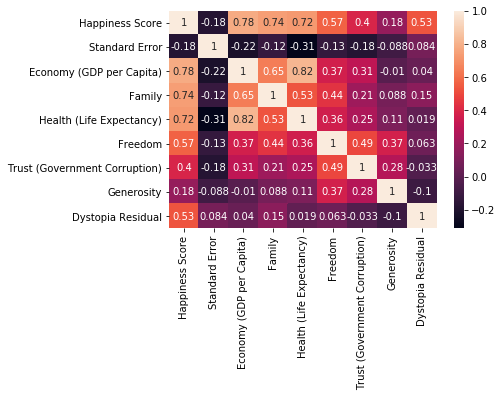

In [11]:
sns.heatmap(df1.corr(),annot=True)
# checking the heatmap in order to get the pictorial representaion of Co-Relation among the attributes.
## 'Standard Error' is crrying very negative co-relation with all attributes. so we might drop the this column for prediction exercise. 

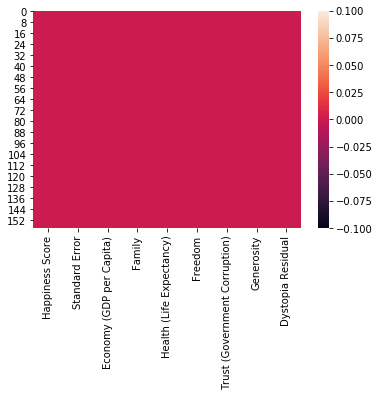

In [12]:
sns.heatmap(df1.isnull())
# ensuring no null values are present through heatmap

In [13]:
df1.drop('Standard Error',inplace=True,axis=1)
# drop the column since its carrying very negative corelation with most of the attributes

In [14]:
df1.shape
# checking the shape after dropping column off

(158, 8)

Happiness Score                     AxesSubplot(0.125,0.536818;0.0945122x0.343182)
Economy (GDP per Capita)         AxesSubplot(0.238415,0.536818;0.0945122x0.343182)
Family                           AxesSubplot(0.351829,0.536818;0.0945122x0.343182)
Health (Life Expectancy)         AxesSubplot(0.465244,0.536818;0.0945122x0.343182)
Freedom                          AxesSubplot(0.578659,0.536818;0.0945122x0.343182)
Trust (Government Corruption)    AxesSubplot(0.692073,0.536818;0.0945122x0.343182)
Generosity                       AxesSubplot(0.805488,0.536818;0.0945122x0.343182)
Dystopia Residual                      AxesSubplot(0.125,0.125;0.0945122x0.343182)
dtype: object

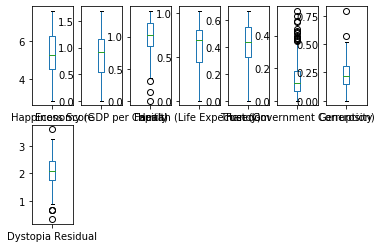

In [15]:
df1.plot(kind='box',subplots=True,layout=(2,7))
# plotting boxplot for all the attributes
## Outliers are present for three attributes - Economy,Government trust & generosity

In [16]:
df1.skew()
#checking the skewness. 

Happiness Score                  0.097769
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

In [17]:
z=np.abs(zscore(df1))
print(np.where(z>3))
#Identifying the outliers considering the threshold vaue for Z score =+/- 3

(array([ 27, 128, 147, 153, 155, 157], dtype=int64), array([5, 6, 2, 5, 7, 2], dtype=int64))


In [18]:
df1n=df1[(z<3).all(axis=1)]
df1n.shape
# Removing the outliers and taking the data into new instance

(152, 8)

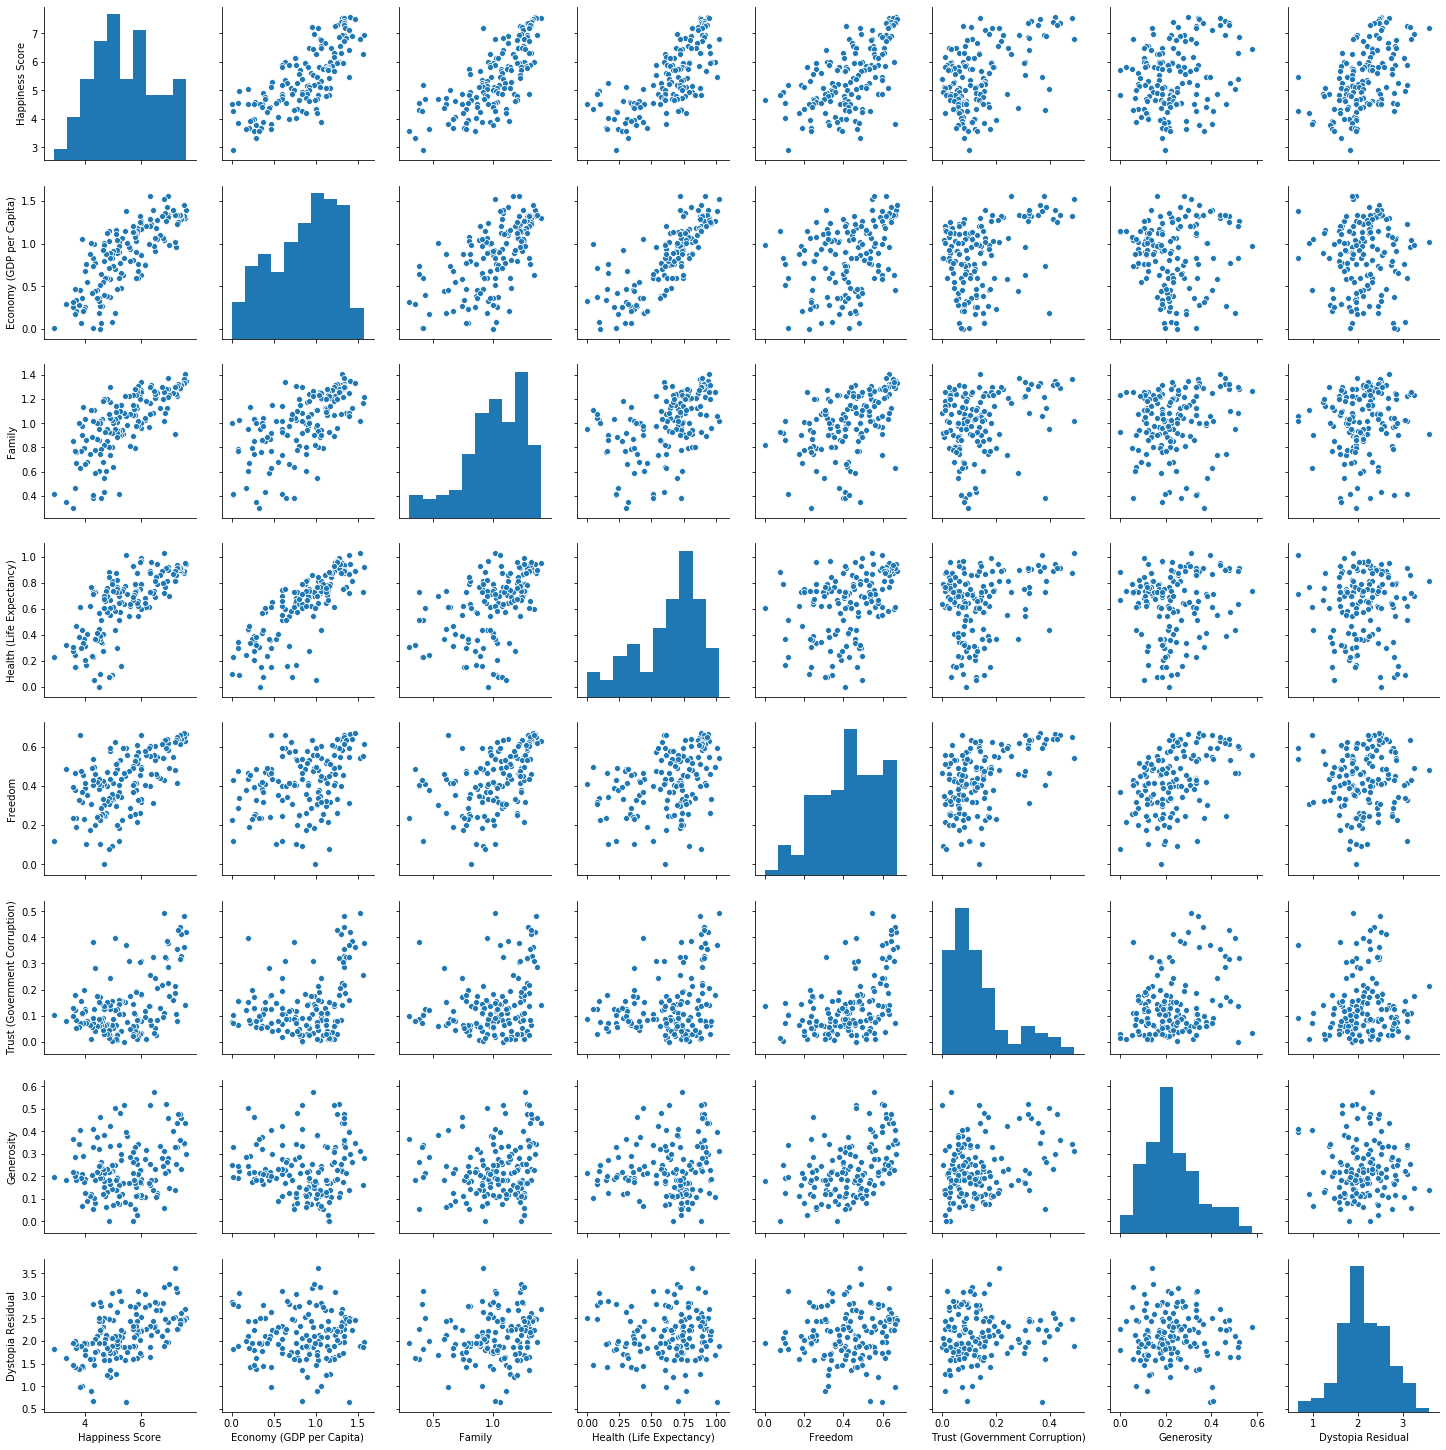

In [19]:
sns.pairplot(df1n)
# checking the co-relation between each two attributes through pictorial presentation

# Setting Up Evaluation Protocol

In [20]:
x=df1n.iloc[:,1:]
x.head() 
# Indentify the the input variables 

,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


In [21]:
y=df1n.iloc[:,0]
y.head()
# Indentify the target attribute

0    7.587
1    7.561
2    7.527
3    7.522
4    7.427
Name: Happiness Score, dtype: float64

In [22]:
maxr=0
for i in range(41,101):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.33)
    lm=LinearRegression(normalize=True)
    lm.fit(x_train,y_train)
    pred=lm.predict(x_test)
    score=lm.score(x_train,y_train)
    print('accuracy score correspondng to random state',i,'is:',score)
    if score>maxr:
        maxr=score
        finalr=i
print()
print('Maximum score corresponding to random state',finalr,'is',maxr)

# Since the target attribute is having continuous values, we can apply Linear Regression to train the model
# we optimise the seed value here identify the random state

accuracy score correspondng to random state 41 is: 0.9999999352297485
accuracy score correspondng to random state 42 is: 0.9999999390210036
accuracy score correspondng to random state 43 is: 0.9999999429433893
accuracy score correspondng to random state 44 is: 0.9999999331891953
accuracy score correspondng to random state 45 is: 0.9999999240013654
accuracy score correspondng to random state 46 is: 0.9999999435435979
accuracy score correspondng to random state 47 is: 0.999999928542059
accuracy score correspondng to random state 48 is: 0.9999999341276785
accuracy score correspondng to random state 49 is: 0.9999999340891111
accuracy score correspondng to random state 50 is: 0.9999999380717572
accuracy score correspondng to random state 51 is: 0.9999999451599298
accuracy score correspondng to random state 52 is: 0.999999937325607
accuracy score correspondng to random state 53 is: 0.9999999373579708
accuracy score correspondng to random state 54 is: 0.999999938965014
accuracy score correspo

In [23]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=88,test_size=0.33)
# so random state 88 gives the optimum resuts. we split the dataset into tarining and testing part using the optimum random state value

# Traning the Model & Prediction

In [24]:
lm.fit(x_train,y_train)
## fitting the training part with algorithm. 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=True)

In [25]:
print('score:',lm.score(x_train,y_train))
# we achieve the score of 0.99 which implies model has learnt almost closed to 99% perfection.

score: 0.9999999491266425


In [26]:
print('error:')   ## calculating the error
print('mean absolute error:', mean_absolute_error(y_test,pred))
print('mean squared error:',mean_squared_error(y_test,pred))
print('root mean squared error:',np.sqrt(mean_squared_error(y_test,pred)))

error:
mean absolute error: 1.4056214885707603
mean squared error: 2.5886009815728745
root mean squared error: 1.6089129813550747


In [27]:
lm.coef_

array([1.00018718, 0.99993592, 0.9997881 , 0.99964277, 0.99999105,
       1.00032761, 1.00002174])

In [28]:
pred

array([4.8393189 , 7.22559146, 4.51446843, 6.98246739, 4.36917148,
       4.2186552 , 6.45465151, 7.56080315, 5.83268142, 5.97520785,
       6.12270366, 4.3320283 , 6.66965607, 6.57399761, 5.47703911,
       4.51229563, 6.13010391, 4.51794065, 5.87832466, 5.71584572,
       4.03306999, 6.47668637, 4.41936945, 6.50501441, 5.12421454,
       2.90471931, 4.55067704, 6.86723052, 4.89750699, 3.8450492 ,
       5.14043306, 4.19438811, 4.67745907, 7.19974278, 6.94617053,
       5.19243629, 4.78647907, 5.98378345, 5.01305328, 3.66726931,
       4.56466266, 4.86710564, 4.29677691, 3.58696743, 5.07328315,
       6.29472216, 7.37806569, 6.75009684, 6.85284391, 5.28640727,
       5.36025533])

In [29]:
rf=RandomForestRegressor(n_estimators=100,random_state=45)

In [30]:
rf.fit(x_train,y_train)
predr=rf.predict(x_test)
print(rf.score(x_train,y_train))
# used ensemble technique to achieve better score

0.9844486050332443


# Saving the Model

In [31]:
joblib.dump(lm,'lmhappiness.obj')
## We settle this dataset with Linear Regression model since the score is higher. we saved the model as well. 

['lmhappiness.obj']